In [645]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch
import numpy as np
from qutip import destroy, qeye, sigmaz, tensor

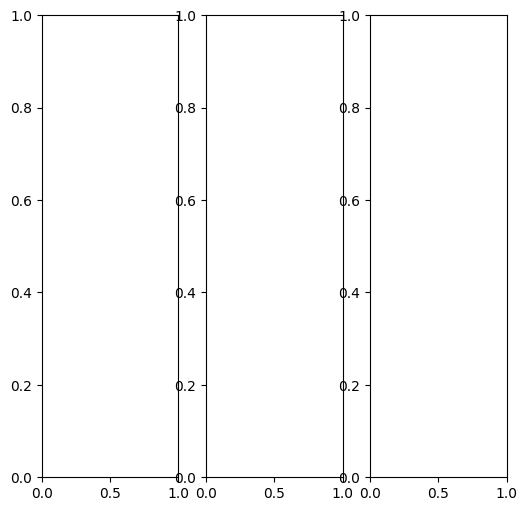

In [646]:
fig, axes = plt.subplots(1, 3, figsize=(6, 6))

# 1 emitter

In [647]:
N = 3

a = tensor(destroy(N), qeye(2))
sigm = tensor(qeye(N), destroy(2))
sigz = tensor(qeye(N), sigmaz())

wc = 4
wa = 4
g = 0.5

kappa = 0.03
gamma = 0.03
c_ops = [
    np.sqrt(kappa) * a,
    np.sqrt(gamma) * sigm,
]

H = (
    wc * a.dag() * a
    + wa * sigm.dag() * sigm
    + g * (a.dag() * sigm + a * sigm.dag())
)

H_eff = H - 1j * kappa * a.dag() * a - 1j * gamma * sigm.dag() * sigm

H_eff.eigenenergies()

array([ 0.        +0.j  ,  3.5       -0.03j,  4.5       -0.03j,
        7.29289322-0.06j,  8.70710678-0.06j, 12.        -0.09j])

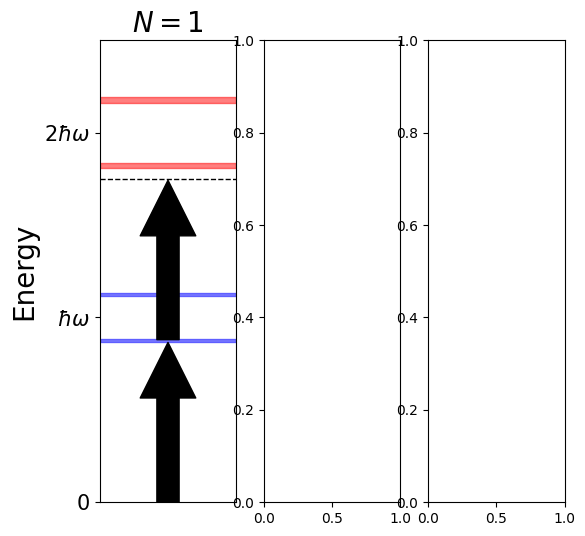

In [648]:
# N=1
ax = axes[0]

for energy in H_eff.eigenenergies()[1:3]:
    center = np.real(energy)
    width = abs(np.imag(energy))
    rect = Rectangle((0, center - width), 1, 2*width, color='blue', alpha=0.5)
    ax.add_patch(rect)

for energy in H_eff.eigenenergies()[3:5]:
    center = np.real(energy)
    width = np.imag(energy)
    rect = Rectangle((0, center - width), 1, 2*width, color='red', alpha=0.5)
    ax.add_patch(rect)


polariton = np.real(H_eff.eigenenergies()[1])
arrow = FancyArrowPatch((0.5, -0.1), (0.5, polariton+0.02),
                                arrowstyle='simple', mutation_scale=0, color='black', lw=1)
ax.add_patch(arrow)
arrow = FancyArrowPatch((0.5, polariton-0.04), (0.5, 2*polariton+0.03),
                                arrowstyle='simple', mutation_scale=80, color='black', lw=1)
ax.add_patch(arrow)

ax.axhline(2*polariton, linestyle='--', color='black', lw=1)


ax.set_ylim(0, 10)

ax.set_yticks([0, wc, 2*wc])
ax.set_yticklabels([0, "$\hbar\omega$", "2$\hbar\omega$"], fontsize=15)
ax.set_ylabel("Energy", fontsize=20)

ax.set_xticks([])
ax.set_title("$N=1$", fontsize=20)
fig

# 2 emitters

In [649]:
N = 3

a = tensor(destroy(N), qeye(2), qeye(2))
sigm1 = tensor(qeye(N), destroy(2), qeye(2))
sigm2 = tensor(qeye(N), qeye(2), destroy(2))
# sigz = tensor(qeye(N), sigmaz())

wc = 4
wa = 4
g = 0.5

kappa = 0.03
gamma = 0.03
# dephasing = 500e-6
c_ops = [
    np.sqrt(kappa) * a,
    np.sqrt(gamma) * sigm1,
    np.sqrt(gamma) * sigm2,
    # np.sqrt(dephasing) * sigz,
]

H = (
    wc * a.dag() * a
    + wa * sigm1.dag() * sigm1
    + wa * sigm2.dag() * sigm2
    + g * (a.dag() * sigm1 + a * sigm1.dag())
    + g * (a.dag() * sigm2 + a * sigm2.dag())
)

H_eff = H - 1j * kappa * a.dag() * a - 1j * gamma * sigm1.dag() * sigm1 - 1j * gamma * sigm2.dag() * sigm2

H_eff.eigenenergies()

array([ 0.        +0.j  ,  3.29289322-0.03j,  4.        -0.03j,
        4.70710678-0.03j,  6.77525513-0.06j,  8.        -0.06j,
        8.        -0.06j,  9.22474487-0.06j, 11.        -0.09j,
       12.        -0.09j, 13.        -0.09j, 16.        -0.12j])

6.7752551286084035
7.999999999999997
7.999999999999998
9.22474487139159


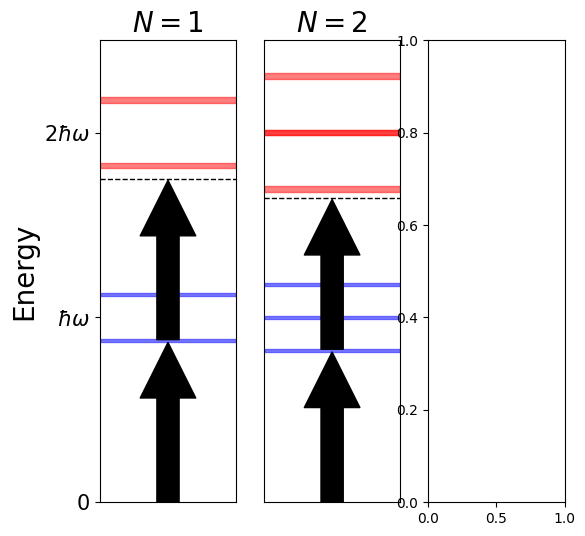

In [650]:
# N=2
ax = axes[1]

for energy in H_eff.eigenenergies()[1:4]:
    center = np.real(energy)
    width = abs(np.imag(energy))
    rect = Rectangle((0, center - width), 1, 2*width, color='blue', alpha=0.5)
    ax.add_patch(rect)

for energy in H_eff.eigenenergies()[4:8]:
    center = np.real(energy)
    print(center)
    width = np.imag(energy)
    rect = Rectangle((0, center - width), 1, 2*width, color='red', alpha=0.5)
    ax.add_patch(rect)


polariton = np.real(H_eff.eigenenergies()[1])
arrow = FancyArrowPatch((0.5, -0.1), (0.5, polariton+0.02),
                                arrowstyle='simple', mutation_scale=80, color='black', lw=1)
ax.add_patch(arrow)
arrow = FancyArrowPatch((0.5, polariton-0.04), (0.5, 2*polariton+0.03),
                                arrowstyle='simple', mutation_scale=80, color='black', lw=1)
ax.add_patch(arrow)

ax.axhline(2*polariton, linestyle='--', color='black', lw=1)

ax.set_ylim(0, 10)

ax.set_xticks([])
ax.set_yticks([])
ax.set_title("$N=2$", fontsize=20)
fig

# 3 emitters

In [651]:
N = 3

a = tensor(destroy(N), qeye(2), qeye(2), qeye(2))
sigm1 = tensor(qeye(N), destroy(2), qeye(2), qeye(2))
sigm2 = tensor(qeye(N), qeye(2), destroy(2), qeye(2))
sigm3 = tensor(qeye(N), qeye(2), qeye(2), destroy(2))
# sigz = tensor(qeye(N), sigmaz())

wc = 4
wa = 4
g = 0.5

kappa = 0.03
gamma = 0.03
c_ops = [
    np.sqrt(kappa) * a,
    np.sqrt(gamma) * sigm1,
    np.sqrt(gamma) * sigm2,
    np.sqrt(gamma) * sigm3,
]

H = (
    wc * a.dag() * a
    + wa * sigm1.dag() * sigm1
    + wa * sigm2.dag() * sigm2
    + wa * sigm3.dag() * sigm3
    + g * (a.dag() * sigm1 + a * sigm1.dag())
    + g * (a.dag() * sigm2 + a * sigm2.dag())
    + g * (a.dag() * sigm3 + a * sigm3.dag())
)

H_eff = H - 1j * kappa * a.dag() * a - 1j * gamma * sigm1.dag() * sigm1 - 1j * gamma * sigm2.dag() * sigm2 - 1j * gamma * sigm3.dag() * sigm3

H_eff.eigenenergies()

array([ 0.        +0.j  ,  3.1339746 -0.03j,  4.        -0.03j,
        4.        -0.03j,  4.8660254 -0.03j,  6.41886117-0.06j,
        7.5       -0.06j,  7.5       -0.06j,  8.        -0.06j,
        8.5       -0.06j,  8.5       -0.06j,  9.58113883-0.06j,
       10.3416876 -0.09j, 11.29289322-0.09j, 11.29289322-0.09j,
       12.        -0.09j, 12.70710678-0.09j, 12.70710678-0.09j,
       13.6583124 -0.09j, 14.77525513-0.12j, 16.        -0.12j,
       16.        -0.12j, 17.22474487-0.12j, 20.        -0.15j])

6.418861169915811
7.500000000000013
7.500000000000022
8.000000000000027
8.500000000000007
8.500000000000012
9.581138830084205


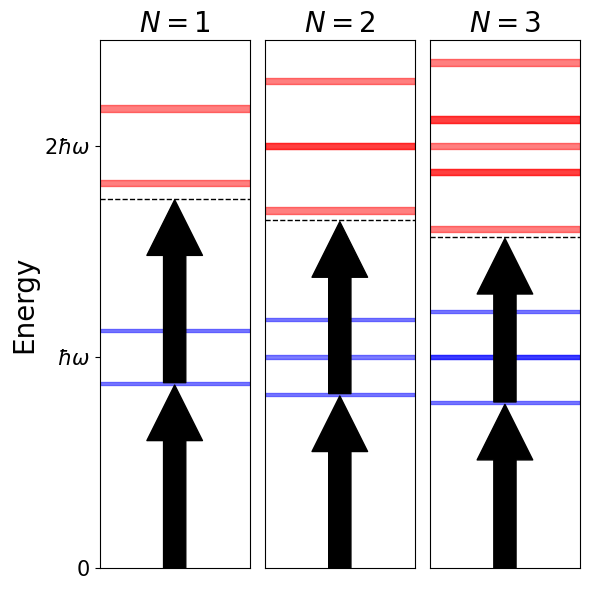

In [652]:
# N=3
ax = axes[2]

for energy in H_eff.eigenenergies()[1:5]:
    center = np.real(energy)
    width = abs(np.imag(energy))
    rect = Rectangle((0, center - width), 1, 2*width, color='blue', alpha=0.5)
    ax.add_patch(rect)

for energy in H_eff.eigenenergies()[5:12]:
    center = np.real(energy)
    print(center)
    width = np.imag(energy)
    rect = Rectangle((0, center - width), 1, 2*width, color='red', alpha=0.5)
    ax.add_patch(rect)


polariton = np.real(H_eff.eigenenergies()[1])
arrow = FancyArrowPatch((0.5, -0.1), (0.5, polariton+0.02),
                                arrowstyle='simple', mutation_scale=80, color='black', lw=1)
ax.add_patch(arrow)
arrow = FancyArrowPatch((0.5, polariton-0.04), (0.5, 2*polariton+0.03),
                                arrowstyle='simple', mutation_scale=80, color='black', lw=1)
ax.add_patch(arrow)

ax.axhline(2*polariton, linestyle='--', color='black', lw=1)

ax.set_yticks([])
ax.set_xticks([])
ax.set_title("$N=3$", fontsize=20)
ax.set_ylim(0, 10)

fig.tight_layout()
fig

# save fig

In [653]:
fig.savefig("subfig_a.eps", bbox_inches="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
